In [4]:
pip install -U imbalanced-learn

     -------------------------------------- 226.0/226.0 kB 3.5 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [1]:
# importing required liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import sklearn

from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier


import joblib

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# screen reset code
# pd.reset_option("max_columns")

In [2]:
# importing dataset
file = pd.read_csv("EEC QUE ANALYSIS.csv")

In [3]:
file

,YEAR,QUE,SUB-QUE,MARKS,UNIT,TOPIC-NO,TOPIC
0,2022,1,a,2,1,1.3,Series and parallel magnetic circuits
1,2022,1,b,2,2,2.2,Single phase A.C. sinusoidal A.C. wave: instan...
2,2022,1,c,2,3,3.3,Phase sequence and balanced and unbalanced load
3,2022,1,d,2,4,4.1,"Transformer: Working principle, emf equation, ..."
4,2022,1,e,2,4,4.5,"Types of D.C. motors, schematic diagram, 1, s..."
...,...,...,...,...,...,...,...
125,2019,5,b,6,3,3.4,"Phase and line current, phase and line voltage..."
126,2019,5,c,6,4,4.5,"Types of D.C. motors, schematic diagram, 1, s..."
127,2019,6,a,6,5,5.3,"Stepper motor: types, principle of working and..."
128,2019,6,b,6,6,6.4,"Earthing: Importance of earthing, factors aff..."


In [4]:
# storing csv file in dataframe
df = pd.DataFrame(file)

In [5]:
df.head()

,YEAR,QUE,SUB-QUE,MARKS,UNIT,TOPIC-NO,TOPIC
0,2022,1,a,2,1,1.3,Series and parallel magnetic circuits
1,2022,1,b,2,2,2.2,Single phase A.C. sinusoidal A.C. wave: instan...
2,2022,1,c,2,3,3.3,Phase sequence and balanced and unbalanced load
3,2022,1,d,2,4,4.1,"Transformer: Working principle, emf equation, ..."
4,2022,1,e,2,4,4.5,"Types of D.C. motors, schematic diagram, 1, s..."



# EDA

In [8]:
# cheking size of df
df.shape

(130, 7)

In [9]:
df.describe()

,YEAR,QUE,MARKS,UNIT,TOPIC-NO
count,130.000000,130.000000,130.000000,130.000000,130.000000
mean,2019.600000,3.076923,3.923077,3.700000,3.988462
std,1.361713,1.714577,1.417583,1.687391,1.684477
min,2018.000000,1.000000,2.000000,1.000000,1.100000
25%,2019.000000,1.000000,2.000000,2.000000,2.325000
50%,2019.000000,3.000000,4.000000,4.000000,4.200000
75%,2020.000000,4.000000,4.000000,5.000000,5.200000
max,2022.000000,6.000000,6.000000,6.000000,6.500000


In [10]:
# checking total numbers of topics asked from 2017-2022 
df['TOPIC'].nunique()

30

In [11]:
130/30

4.333333333333333

In [9]:
# storing topic numbers in array so that avg can be calculated
topics_array = np.array(df["TOPIC-NO"])

In [10]:
unit_avg = np.mean(topics_array)
print(unit_avg)

3.9884615384615385


In [11]:
6*unit_avg

23.93076923076923

In [12]:
# checking names of topics
print(df['TOPIC'].unique())

['Series and parallel magnetic circuits'
 'Single phase A.C. sinusoidal A.C. wave: instantaneous value, cycle, amplitude, time period, frequency, angular frequency, R.M.S. value, Average value for sinusoidal waveform, Form factor, Peak factor'
 'Phase sequence and balanced and unbalanced load'
 'Transformer: Working principle, emf equation, Voltage ratio, current ratio and transformation ratio, losses'
 'Types of D.C. motors, schematic diagram, 1,  series and compound motors'
 'Stepper motor: types, principle of working and applications'
 'Earthing:  Importance of earthing, factors affecting earthing'
 'B-H curve and hysteresis, hysteresis loop and hysteresis loss.'
 'Current, power, power factor in a 3 phase balanced system'
 'Auto-transformer - comparison with two winding transformer, applications'
 'Magnetic flux, flux density, magneto motive force, magnetic field strength, permeability, reluctance'
 'DC motor construction - parts its function and material used'
 'FHP: Schematic rep

### Data Visualization

In [13]:
df.columns

Index(['YEAR', 'QUE', 'SUB-QUE', 'MARKS', 'UNIT', 'TOPIC-NO', 'TOPIC'], dtype='object')

In [14]:
# setting whitegrid theme`
sns.set_theme(style="whitegrid")

<AxesSubplot:xlabel='UNIT', ylabel='Count'>

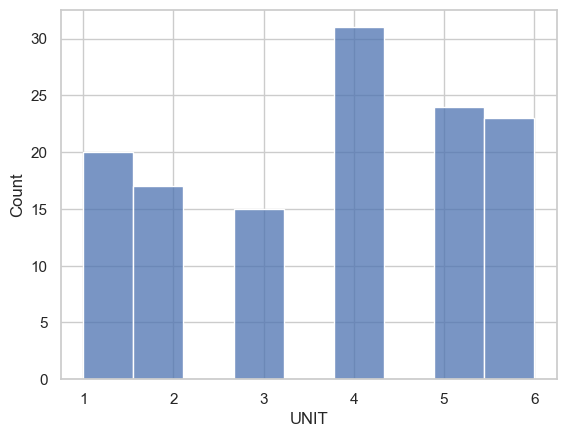

In [15]:
# checking 
sns.histplot(df["UNIT"])

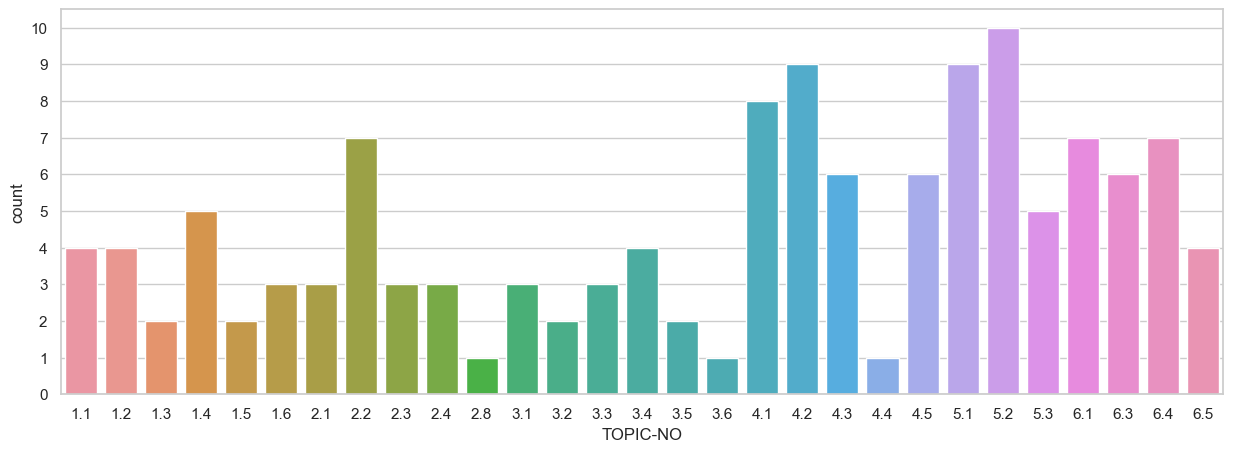

In [142]:
plt.figure(figsize=(15,5))
sns.countplot(df["TOPIC-NO"]).set_yticks([0,1,2,3,4,5,6,7,8,9,10])    # settled custom y axis using yticks

tried to automate writing above observation

In [143]:
# #checking frquency of each topic
# topic_no_freq = df["TOPIC-NO"].value_counts()
# topic_no_freq_df = pd.DataFrame(topic_no_freq)
# #cdumped to csv to rename header and index
# topic_no_freq_csv = topic_no_freq_df.to_csv()

In [144]:
# # importing,renaming that csv
# topic_no_freq_df = pd.read_csv(topic_no_freq_csv,header = None, names = ['TOPIC-NO','FREQ'])

In [213]:
df.columns

Index(['YEAR', 'QUE', 'SUB-QUE', 'MARKS', 'UNIT', 'TOPIC-NO', 'TOPIC'], dtype='object')

In [214]:
df.head()

,YEAR,QUE,SUB-QUE,MARKS,UNIT,TOPIC-NO,TOPIC
0,2022,1,a,2,1,1.3,Series and parallel magnetic circuits
1,2022,1,b,2,2,2.2,Single phase A.C. sinusoidal A.C. wave: instan...
2,2022,1,c,2,3,3.3,Phase sequence and balanced and unbalanced load
3,2022,1,d,2,4,4.1,"Transformer: Working principle, emf equation, ..."
4,2022,1,e,2,4,4.5,"Types of D.C. motors, schematic diagram, 1, s..."


<AxesSubplot:xlabel='UNIT', ylabel='MARKS'>

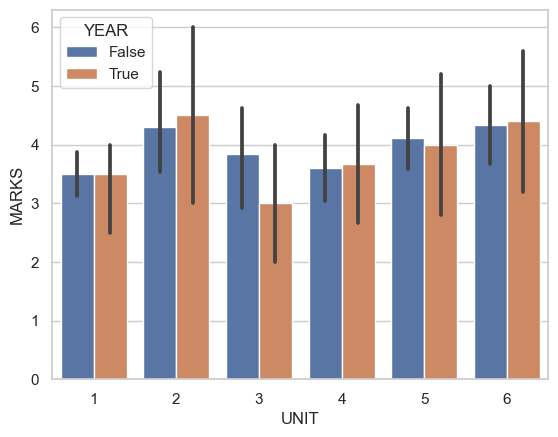

In [224]:
sns.barplot(df["UNIT"],df['MARKS'],hue = df['YEAR']==2022)

<AxesSubplot:xlabel='UNIT'>

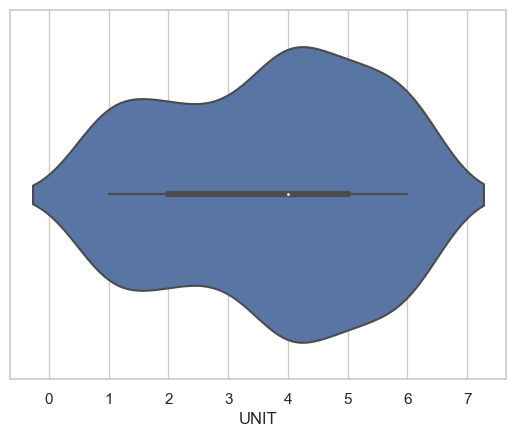

In [229]:
sns.violinplot(df['UNIT'])

In [243]:
df['YEAR'].unique()

array([2022, 2018, 2020, 2019], dtype=int64)

In [255]:
# creating 2022 year dataframe
_2022 = pd.DataFrame(df[df["YEAR"]==2022])
_2020 = pd.DataFrame(df[df["YEAR"]==2020])
_2019 = pd.DataFrame(df[df["YEAR"]==2019])
_2018 = pd.DataFrame(df[df["YEAR"]==2018])

_2022

,YEAR,QUE,SUB-QUE,MARKS,UNIT,TOPIC-NO,TOPIC
0,2022,1,a,2,1,1.3,Series and parallel magnetic circuits
1,2022,1,b,2,2,2.2,Single phase A.C. sinusoidal A.C. wave: instan...
2,2022,1,c,2,3,3.3,Phase sequence and balanced and unbalanced load
3,2022,1,d,2,4,4.1,"Transformer: Working principle, emf equation, ..."
4,2022,1,e,2,4,4.5,"Types of D.C. motors, schematic diagram, 1, s..."
5,2022,1,f,2,5,5.3,"Stepper motor: types, principle of working and..."
6,2022,1,g,2,6,6.4,"Earthing: Importance of earthing, factors aff..."
7,2022,2,a,4,1,1.6,"B-H curve and hysteresis, hysteresis loop and ..."
8,2022,2,b,4,2,2.2,Single phase A.C. sinusoidal A.C. wave: instan...
9,2022,2,c,4,3,3.5,"Current, power, power factor in a 3 phase bala..."


In [256]:
# # analyzing topics as per marks 
# years_data = ['_2022','_2020','2019','2018']
# for i in years_data:
#     print(i)
#     sns.swarmplot(data = i , x= 'TOPIC-NO', y='MARKS')

<AxesSubplot:xlabel='TOPIC-NO', ylabel='MARKS'>

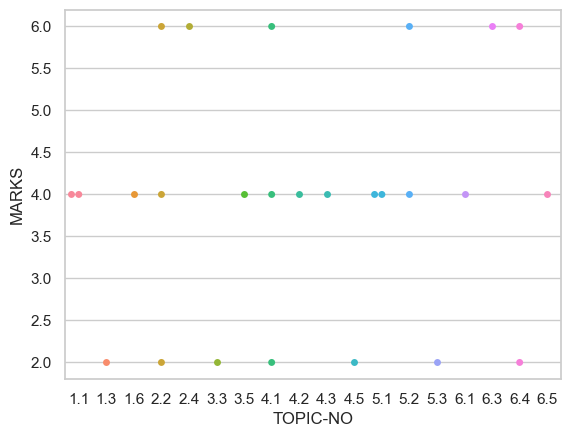

In [257]:
sns.swarmplot(data = _2022 , x= 'TOPIC-NO', y='MARKS')

<AxesSubplot:xlabel='TOPIC-NO', ylabel='MARKS'>

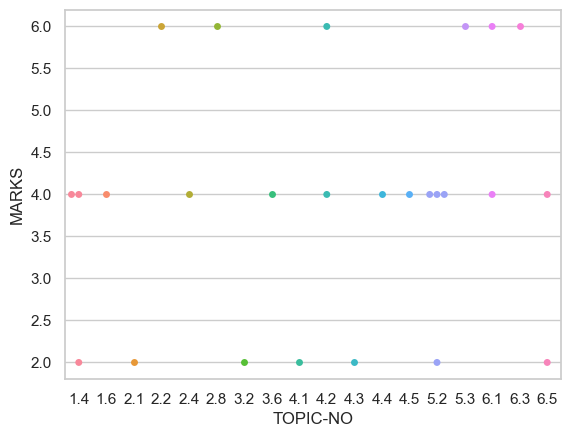

In [258]:
sns.swarmplot(data = _2020 , x= 'TOPIC-NO', y='MARKS')

<AxesSubplot:xlabel='TOPIC-NO', ylabel='MARKS'>

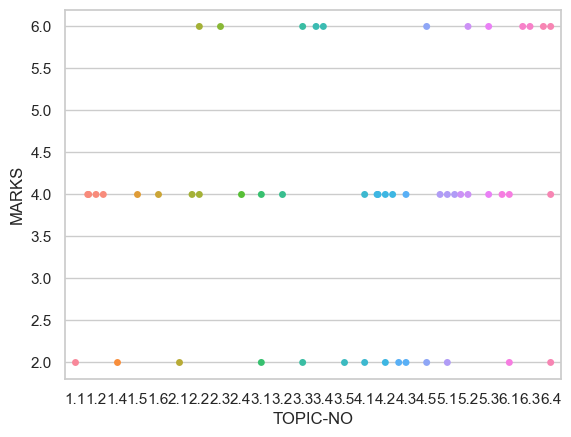

In [259]:
sns.swarmplot(data = _2019 , x= 'TOPIC-NO', y='MARKS')

<AxesSubplot:xlabel='TOPIC-NO', ylabel='MARKS'>

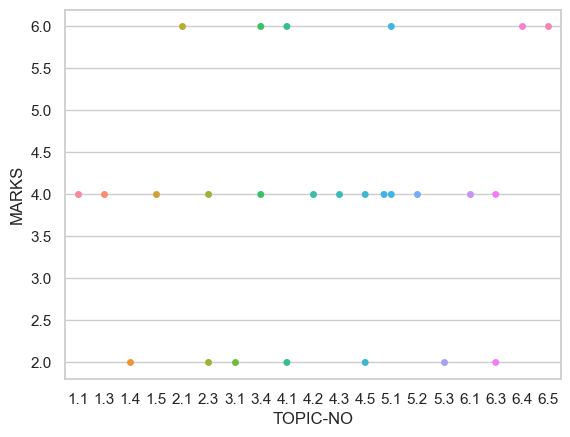

In [260]:
sns.swarmplot(data = _2018 , x= 'TOPIC-NO', y='MARKS')

In [263]:
df.columns

Index(['YEAR', 'QUE', 'SUB-QUE', 'MARKS', 'UNIT', 'TOPIC-NO', 'TOPIC'], dtype='object')

<AxesSubplot:xlabel='TOPIC-NO', ylabel='Density'>

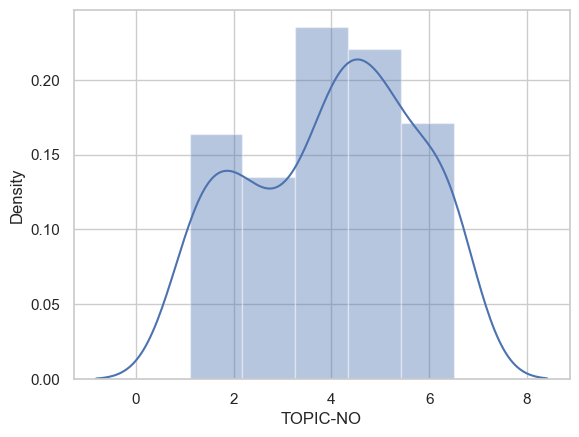

In [262]:
sns.distplot(df["TOPIC-NO"])

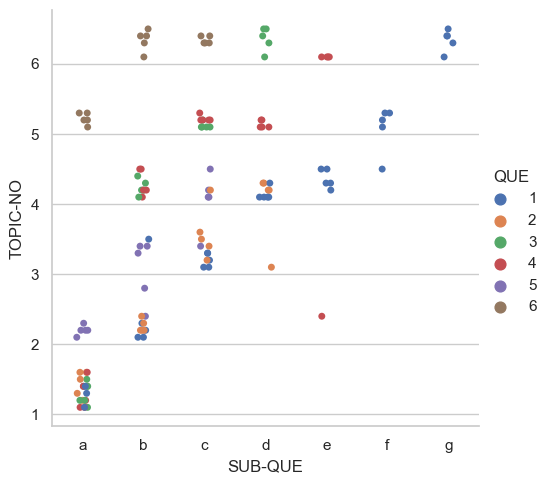

In [270]:
sns.catplot(data=df, x="SUB-QUE", y="TOPIC-NO",hue= "QUE")    #.set_yticks(range(0,6.8))

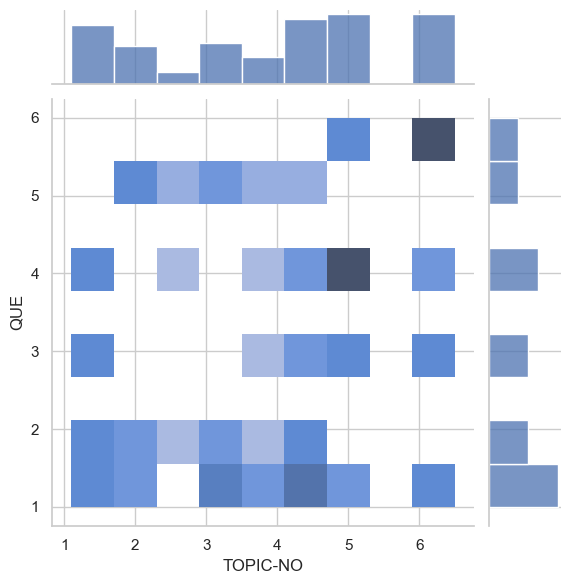

In [271]:
sns.jointplot(data=df, x="TOPIC-NO", y="QUE", kind="hist")

#### Correelation Test`

<AxesSubplot:>

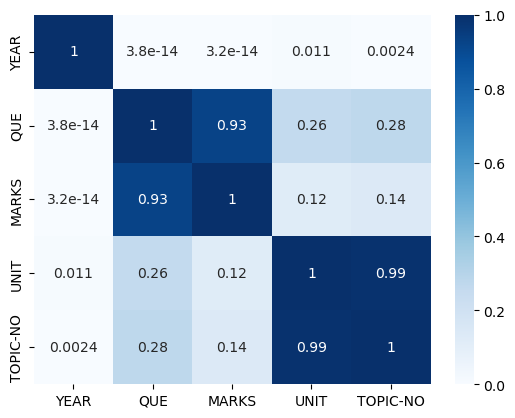

In [16]:
sns.heatmap(df.corr(),annot=True,cmap="Blues")

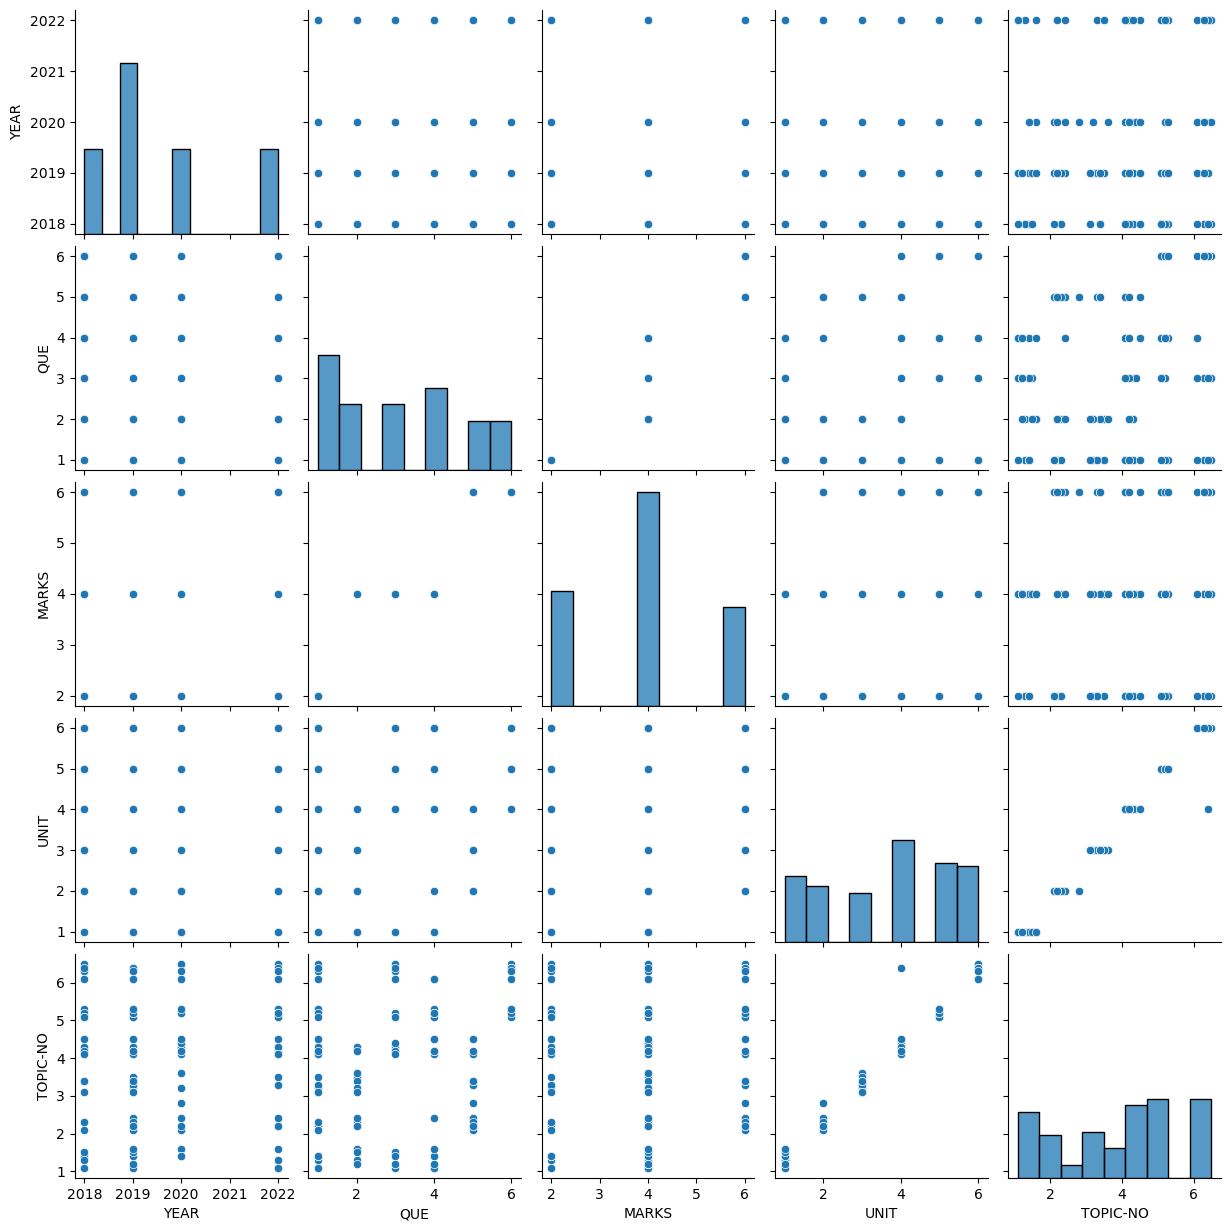

In [100]:
sns.pairplot(df)

### Pandas SQL

In [287]:
_1c= df[(df['QUE']==1) & (df['SUB-QUE']=='c')]
_1c

,YEAR,QUE,SUB-QUE,MARKS,UNIT,TOPIC-NO,TOPIC
2,2022,1,c,2,3,3.3,Phase sequence and balanced and unbalanced load
28,2018,1,c,2,3,3.1,3 phase system over 1 phase system
54,2020,1,c,2,3,3.2,3-phase emf generation and its wave form
80,2019,1,c,2,3,3.3,Phase sequence and balanced and unbalanced load
106,2019,1,c,2,3,3.1,3 phase system over 1 phase system


In [288]:
_1c["TOPIC-NO"].value_counts()

3.3    2
3.1    2
3.2    1
Name: TOPIC-NO, dtype: int64

Automated This Process

In [92]:
subque = ['a','b','c','d','e','f','g']

for i in subque:
    for o in [1,1,1,1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,4,5,5,5,6,6,6]:
        perticular_que_topics = df[(df['QUE']==o) & (df['SUB-QUE']==i)]
        perticular_que_freq_topics = perticular_que_topics["TOPIC-NO"].value_counts()
        print("Que",o,f"Sub-Question {i}:")
        print(perticular_que_freq_topics,"\n")

Que 1 Sub-Question a:
1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64 

Que 1 Sub-Question a:
1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64 

Que 1 Sub-Question a:
1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64 

Que 1 Sub-Question a:
1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64 

Que 1 Sub-Question a:
1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64 

Que 1 Sub-Question a:
1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64 

Que 1 Sub-Question a:
1.4    3
1.3    1
1.1    1
Name: TOPIC-NO, dtype: int64 

Que 2 Sub-Question a:
1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64 

Que 2 Sub-Question a:
1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64 

Que 2 Sub-Question a:
1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64 

Que 2 Sub-Question a:
1.6    2
1.3    1
1.2    1
1.5    1
Name: TOPIC-NO, dtype: int64 

Que 3 Sub-Question a:
1.2    2
1.1    1
1.5    1
1.4    1
Name: TOPIC-NO, dtype: int

Que 1 Sub-Question e:
4.5    2
4.3    2
4.2    1
Name: TOPIC-NO, dtype: int64 

Que 1 Sub-Question e:
4.5    2
4.3    2
4.2    1
Name: TOPIC-NO, dtype: int64 

Que 1 Sub-Question e:
4.5    2
4.3    2
4.2    1
Name: TOPIC-NO, dtype: int64 

Que 1 Sub-Question e:
4.5    2
4.3    2
4.2    1
Name: TOPIC-NO, dtype: int64 

Que 1 Sub-Question e:
4.5    2
4.3    2
4.2    1
Name: TOPIC-NO, dtype: int64 

Que 1 Sub-Question e:
4.5    2
4.3    2
4.2    1
Name: TOPIC-NO, dtype: int64 

Que 2 Sub-Question e:
Series([], Name: TOPIC-NO, dtype: int64) 

Que 2 Sub-Question e:
Series([], Name: TOPIC-NO, dtype: int64) 

Que 2 Sub-Question e:
Series([], Name: TOPIC-NO, dtype: int64) 

Que 2 Sub-Question e:
Series([], Name: TOPIC-NO, dtype: int64) 

Que 3 Sub-Question e:
Series([], Name: TOPIC-NO, dtype: int64) 

Que 3 Sub-Question e:
Series([], Name: TOPIC-NO, dtype: int64) 

Que 3 Sub-Question e:
Series([], Name: TOPIC-NO, dtype: int64) 

Que 3 Sub-Question e:
Series([], Name: TOPIC-NO, dtype: int64) 



## Data Preprocessing + Feature Engineering

In [155]:
df.dtypes

YEAR          int64
QUE           int64
SUB-QUE      object
MARKS         int64
UNIT          int64
TOPIC-NO    float64
TOPIC        object
dtype: object

In [63]:
df['TOPIC-NO']=df['TOPIC-NO'].astype('object')

In [64]:
df.dtypes

YEAR         int64
QUE          int64
SUB-QUE     object
MARKS        int64
UNIT         int64
TOPIC-NO    object
dtype: object

#### Outliers

#### VIF

In [29]:
df.head()

,YEAR,QUE,SUB-QUE,MARKS,UNIT,TOPIC-NO,TOPIC
0,2022,1,a,2,1,1.3,Series and parallel magnetic circuits
1,2022,1,b,2,2,2.2,Single phase A.C. sinusoidal A.C. wave: instan...
2,2022,1,c,2,3,3.3,Phase sequence and balanced and unbalanced load
3,2022,1,d,2,4,4.1,"Transformer: Working principle, emf equation, ..."
4,2022,1,e,2,4,4.5,"Types of D.C. motors, schematic diagram, 1, s..."


#### Dropping Column

In [156]:
topic_num = pd.DataFrame(df['TOPIC-NO'])

In [157]:
df.drop(['TOPIC-NO'],axis=1,inplace=True)

In [158]:
df.columns

Index(['YEAR', 'QUE', 'SUB-QUE', 'MARKS', 'UNIT', 'TOPIC'], dtype='object')

#### SKEW

<AxesSubplot:xlabel='TOPIC-NO', ylabel='Density'>

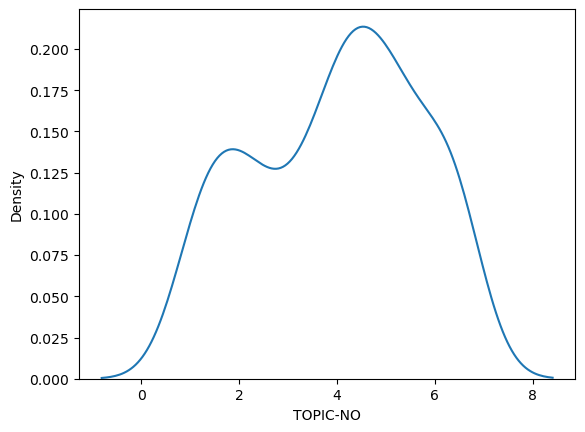

In [132]:
sns.kdeplot(df['TOPIC-NO'])

#### Label Encoding`

In [12]:
LE= LabelEncoder()

In [6]:
obj_var = df.select_dtypes(include='object')

for col in df.select_dtypes(include='object'):
    print("Value counts before label encoding for column : ",col)
    print(df[col].value_counts())
    # Perform label encoding
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

    # Print the value counts after label encoding
    print("Value counts after label encoding for column : ",col)
    print(df[col].value_counts())

Value counts before label encoding for column :  SUB-QUE
a    30
b    30
c    30
d    20
e    10
f     5
g     5
Name: SUB-QUE, dtype: int64
Value counts after label encoding for column :  SUB-QUE
0    30
1    30
2    30
3    20
4    10
5     5
6     5
Name: SUB-QUE, dtype: int64
Value counts before label encoding for column :  TOPIC
Universal motor: principle of operation. reversal of rotation and applications                                                                                                                                             10
Auto-transformer - comparison with two winding transformer, applications                                                                                                                                                    9
FHP: Schematic representation, principle of operation and applications of: split phase Induction motor, capacitor start induction run. capacitor start capacitor run and permanent capacitor motors, shaded pole motors     

In [7]:
df.dtypes

YEAR          int64
QUE           int64
SUB-QUE       int32
MARKS         int64
UNIT          int64
TOPIC-NO    float64
TOPIC         int32
dtype: object

#### Train Test Split

In [14]:
x = df.iloc[:,:-1]

In [15]:
y = df.iloc[:,-1]

In [16]:
x

,YEAR,QUE,SUB-QUE,MARKS,UNIT,TOPIC-NO
0,2022,1,0,2,1,1.3
1,2022,1,1,2,2,2.2
2,2022,1,2,2,3,3.3
3,2022,1,3,2,4,4.1
4,2022,1,4,2,4,4.5
...,...,...,...,...,...,...
125,2019,5,1,6,3,3.4
126,2019,5,2,6,4,4.5
127,2019,6,0,6,5,5.3
128,2019,6,1,6,6,6.4


In [17]:
y

0      22
1      23
2      19
3      26
4      27
       ..
125    18
126    27
127    25
128    10
129    15
Name: TOPIC, Length: 130, dtype: int32

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [19]:
x_train

,YEAR,QUE,SUB-QUE,MARKS,UNIT,TOPIC-NO
70,2020,4,3,4,5,5.2
78,2019,1,0,2,1,1.4
47,2018,5,1,6,3,3.4
0,2022,1,0,2,1,1.3
12,2022,3,1,4,4,4.3
...,...,...,...,...,...,...
71,2020,4,4,4,6,6.1
106,2019,1,2,2,3,3.1
14,2022,3,3,4,6,6.5
92,2019,3,3,4,6,6.1


In [20]:
y_test

55     26
40     15
19     14
31     25
115    11
56      7
69     28
105     2
81      8
26     13
95     25
27     29
64      6
4      27
97     21
100    18
36      8
80     19
93     11
84     10
18     12
10      3
120     3
11     16
126    27
45     14
Name: TOPIC, dtype: int32

### Using Algorithms

#### Logistic Reg

In [21]:
lr = LogisticRegression()

In [22]:
lr.fit(x_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_pred = lr.predict(x_test)

In [24]:
accuracy_score(y_test,y_pred)

0.23076923076923078

#### Cross Validating Models

In [25]:
knn= KNeighborsClassifier()
dtc= DecisionTreeClassifier()
svc = SVC()
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()

In [26]:
estimators=[knn,dtc,svc,RFC,GBC,ABC]
VotingClassifier(estimators=estimators)

VotingClassifier(estimators=[KNeighborsClassifier(), DecisionTreeClassifier(),
                             SVC(), RandomForestClassifier(),
                             GradientBoostingClassifier(),
                             AdaBoostClassifier()])

In [27]:
models = [dtc,svc,knn,RFC,GBC,ABC]

In [28]:
for i in models:
    i.fit(x_train,y_train)
    models_pred=i.predict(x_test)
    print('cross_val_score of ',i,cross_val_score(i, x, y, cv=9))
    print('mean cross_val_score',i,cross_val_score(i, x, y, cv=9).mean())
    print('\n')

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(


cross_val_score of  DecisionTreeClassifier() [0.8        0.8        0.93333333 0.93333333 0.92857143 0.85714286
 0.85714286 0.92857143 0.78571429]
mean cross_val_score DecisionTreeClassifier() 0.9068783068783068


cross_val_score of  SVC() [0.2        0.06666667 0.06666667 0.06666667 0.07142857 0.07142857
 0.07142857 0.07142857 0.07142857]
mean cross_val_score SVC() 0.08412698412698412


cross_val_score of  KNeighborsClassifier() [0.33333333 0.13333333 0.4        0.33333333 0.35714286 0.28571429
 0.14285714 0.35714286 0.14285714]


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavi

mean cross_val_score KNeighborsClassifier() 0.2761904761904762




C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(


cross_val_score of  RandomForestClassifier() [0.6        0.66666667 0.73333333 0.8        0.5        0.71428571
 0.64285714 0.64285714 0.64285714]


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(


mean cross_val_score RandomForestClassifier() 0.628042328042328




C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(


cross_val_score of  GradientBoostingClassifier() [1.         0.93333333 0.93333333 0.93333333 0.92857143 0.85714286
 0.85714286 0.85714286 0.92857143]


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(


mean cross_val_score GradientBoostingClassifier() 0.9142857142857141




C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(


cross_val_score of  AdaBoostClassifier() [0.66666667 0.73333333 0.4        0.6        0.5        0.42857143
 0.5        0.64285714 0.5       ]


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(


mean cross_val_score AdaBoostClassifier() 0.5529100529100529




#### Hyperparameter tuning

In [199]:
svc_parameters= {'kernel': ['linear','rbf']}

In [200]:
gscv = GridSearchCV(svc,svc_parameters)

In [201]:
gscv.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=SVC(), param_grid={'kernel': ['linear', 'rbf']})

In [202]:
print('best score is:',gscv.best_score_,'\n','best estimator_s kernal:',gscv.best_estimator_.kernel,'best parameter :',gscv.best_params_)

best score is: 0.21190476190476187 
 best estimator_s kernal: linear best parameter : {'kernel': 'linear'}


#### pred

In [208]:
df.sample()

,YEAR,QUE,SUB-QUE,MARKS,UNIT,TOPIC
0,2022,1,0,2,1,22


In [224]:
data1 = [2022,1,0,2,1]

In [225]:
def prediction(data1):
    data1= np.array(data1)
    data1= data1.reshape(1,-1)
    pred= RFC.predict(data1)
    print(pred)
    print("cv_score",cross_val_score(RFC,x,y,cv=9).mean())

In [226]:
prediction(data1)

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(


[22]
cv_score 0.2529100529100529


In [227]:
df.sample()

,YEAR,QUE,SUB-QUE,MARKS,UNIT,TOPIC
35,2018,2,2,4,3,18


In [228]:
data1 = [2018,6,2,6,4]

In [229]:
def prediction(data1):
    data1= np.array(data1)
    data1= data1.reshape(1,-1)
    pred= RFC.predict(data1)
    print(pred)
    print("cv_score",cross_val_score(RFC,x,y,cv=9).mean())

In [230]:
prediction(data1)

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(


[10]
cv_score 0.2523809523809524


#### 2023 Pred

In [231]:
df.columns

Index(['YEAR', 'QUE', 'SUB-QUE', 'MARKS', 'UNIT', 'TOPIC'], dtype='object')

In [232]:
data1 = [2023,1,1,2,1]

In [233]:
def prediction(data1):
    data1= np.array(data1)
    data1= data1.reshape(1,-1)
    pred= RFC.predict(data1)
    print(pred)
    print("cv_score",cross_val_score(RFC,x,y,cv=9).mean())

In [234]:
prediction(data1)

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  warnings.warn(


[23]
cv_score 0.21481481481481482


In [8]:
import joblib

In [29]:
joblib.dump(RFC,"EEC Prediction RFC")

['EEC Prediction RFC']